In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("fixed_deposit_train.csv")

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.index=df['ID']
df.drop('ID',axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


Here we can see there are object data types, we will encode them in the later part for proper prediction.

In [6]:
#Seprating categorical columns & numerical columns
cat_col=[]
for i in df:
    if df[i].dtype=='object':
        cat_col.append(i)
print(cat_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [7]:
num_col=[]
for i in df:
    if df[i].dtype!='object':
        num_col.append(i)
print(num_col)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Description

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Here there are no null values in the dataset.  
There are outliers present in the dataset.
Skewness is present in the dataset.

In [9]:
#Checking for null values
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Here we can clearly see there are no null values in any column.

<AxesSubplot:ylabel='ID'>

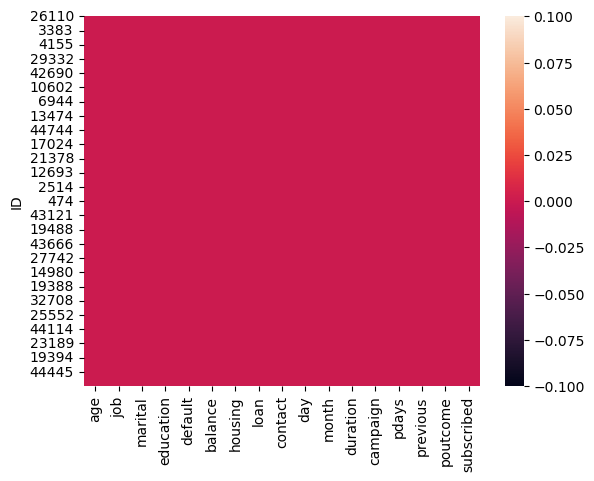

In [10]:
#Visulaizing the null values
sns.heatmap(df.isnull())

Here there is only 1 colour which means there are no null values.

# Visualization

# Uni-Variate Analysis

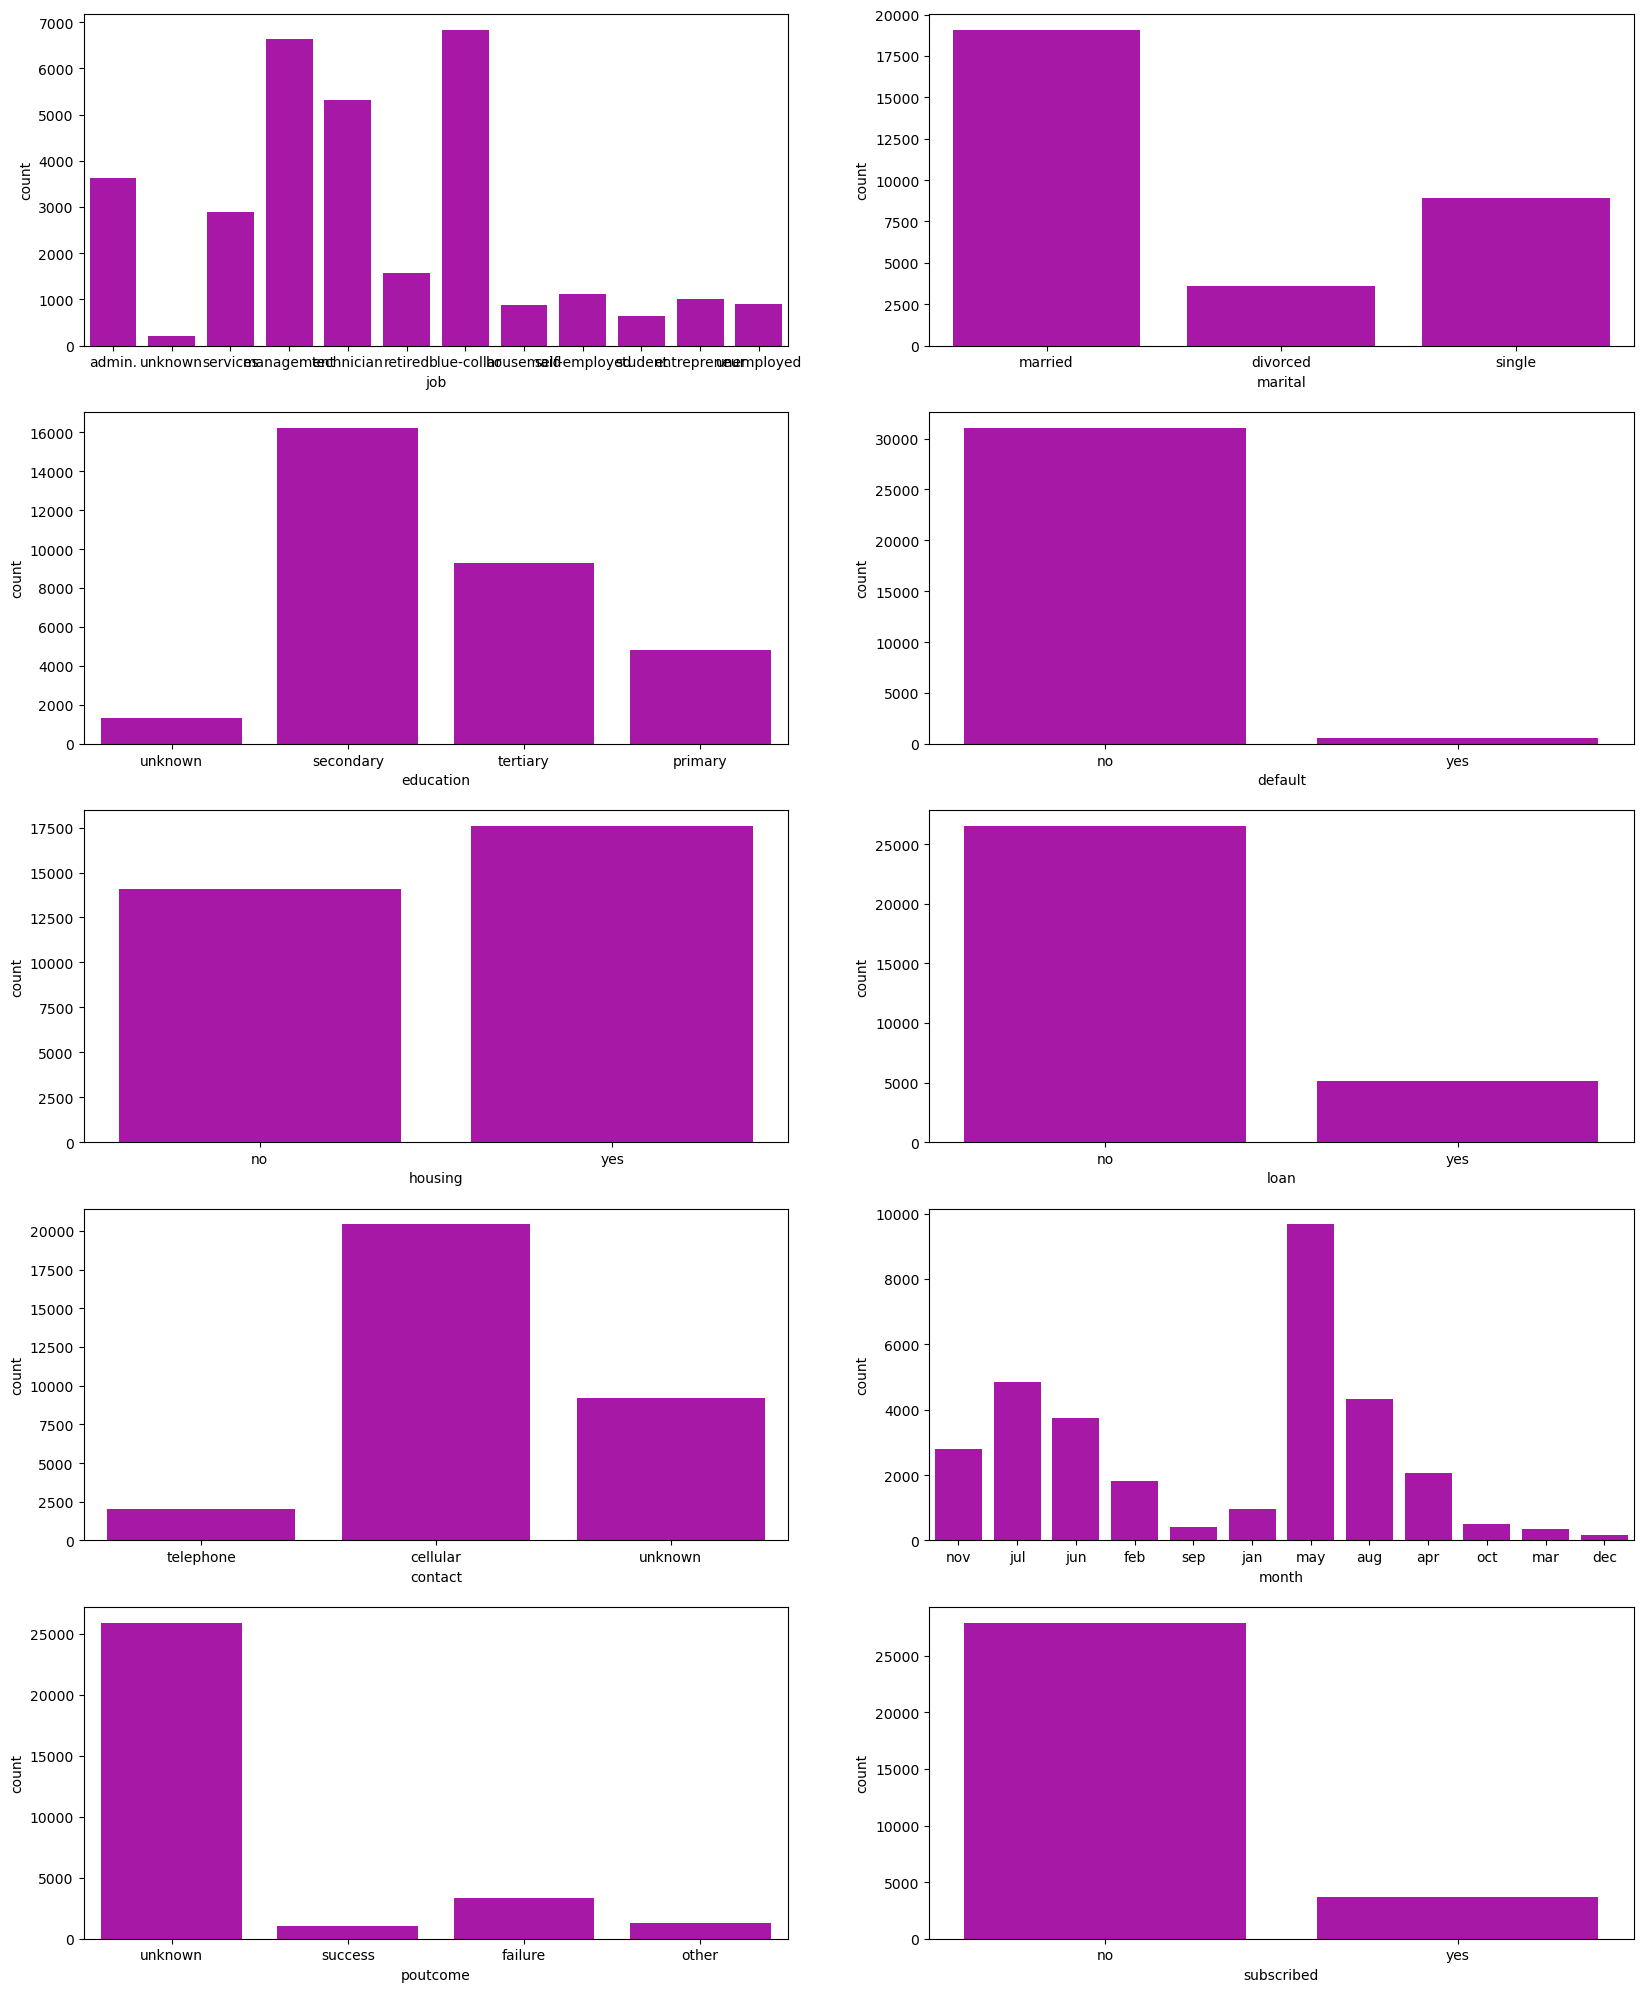

In [11]:
plt.figure (figsize=(20,25))
p=1
for i in cat_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.countplot(df[i],color='m')
        plt.xlabel(i,fontsize=10)
    p+=1
plt.show()

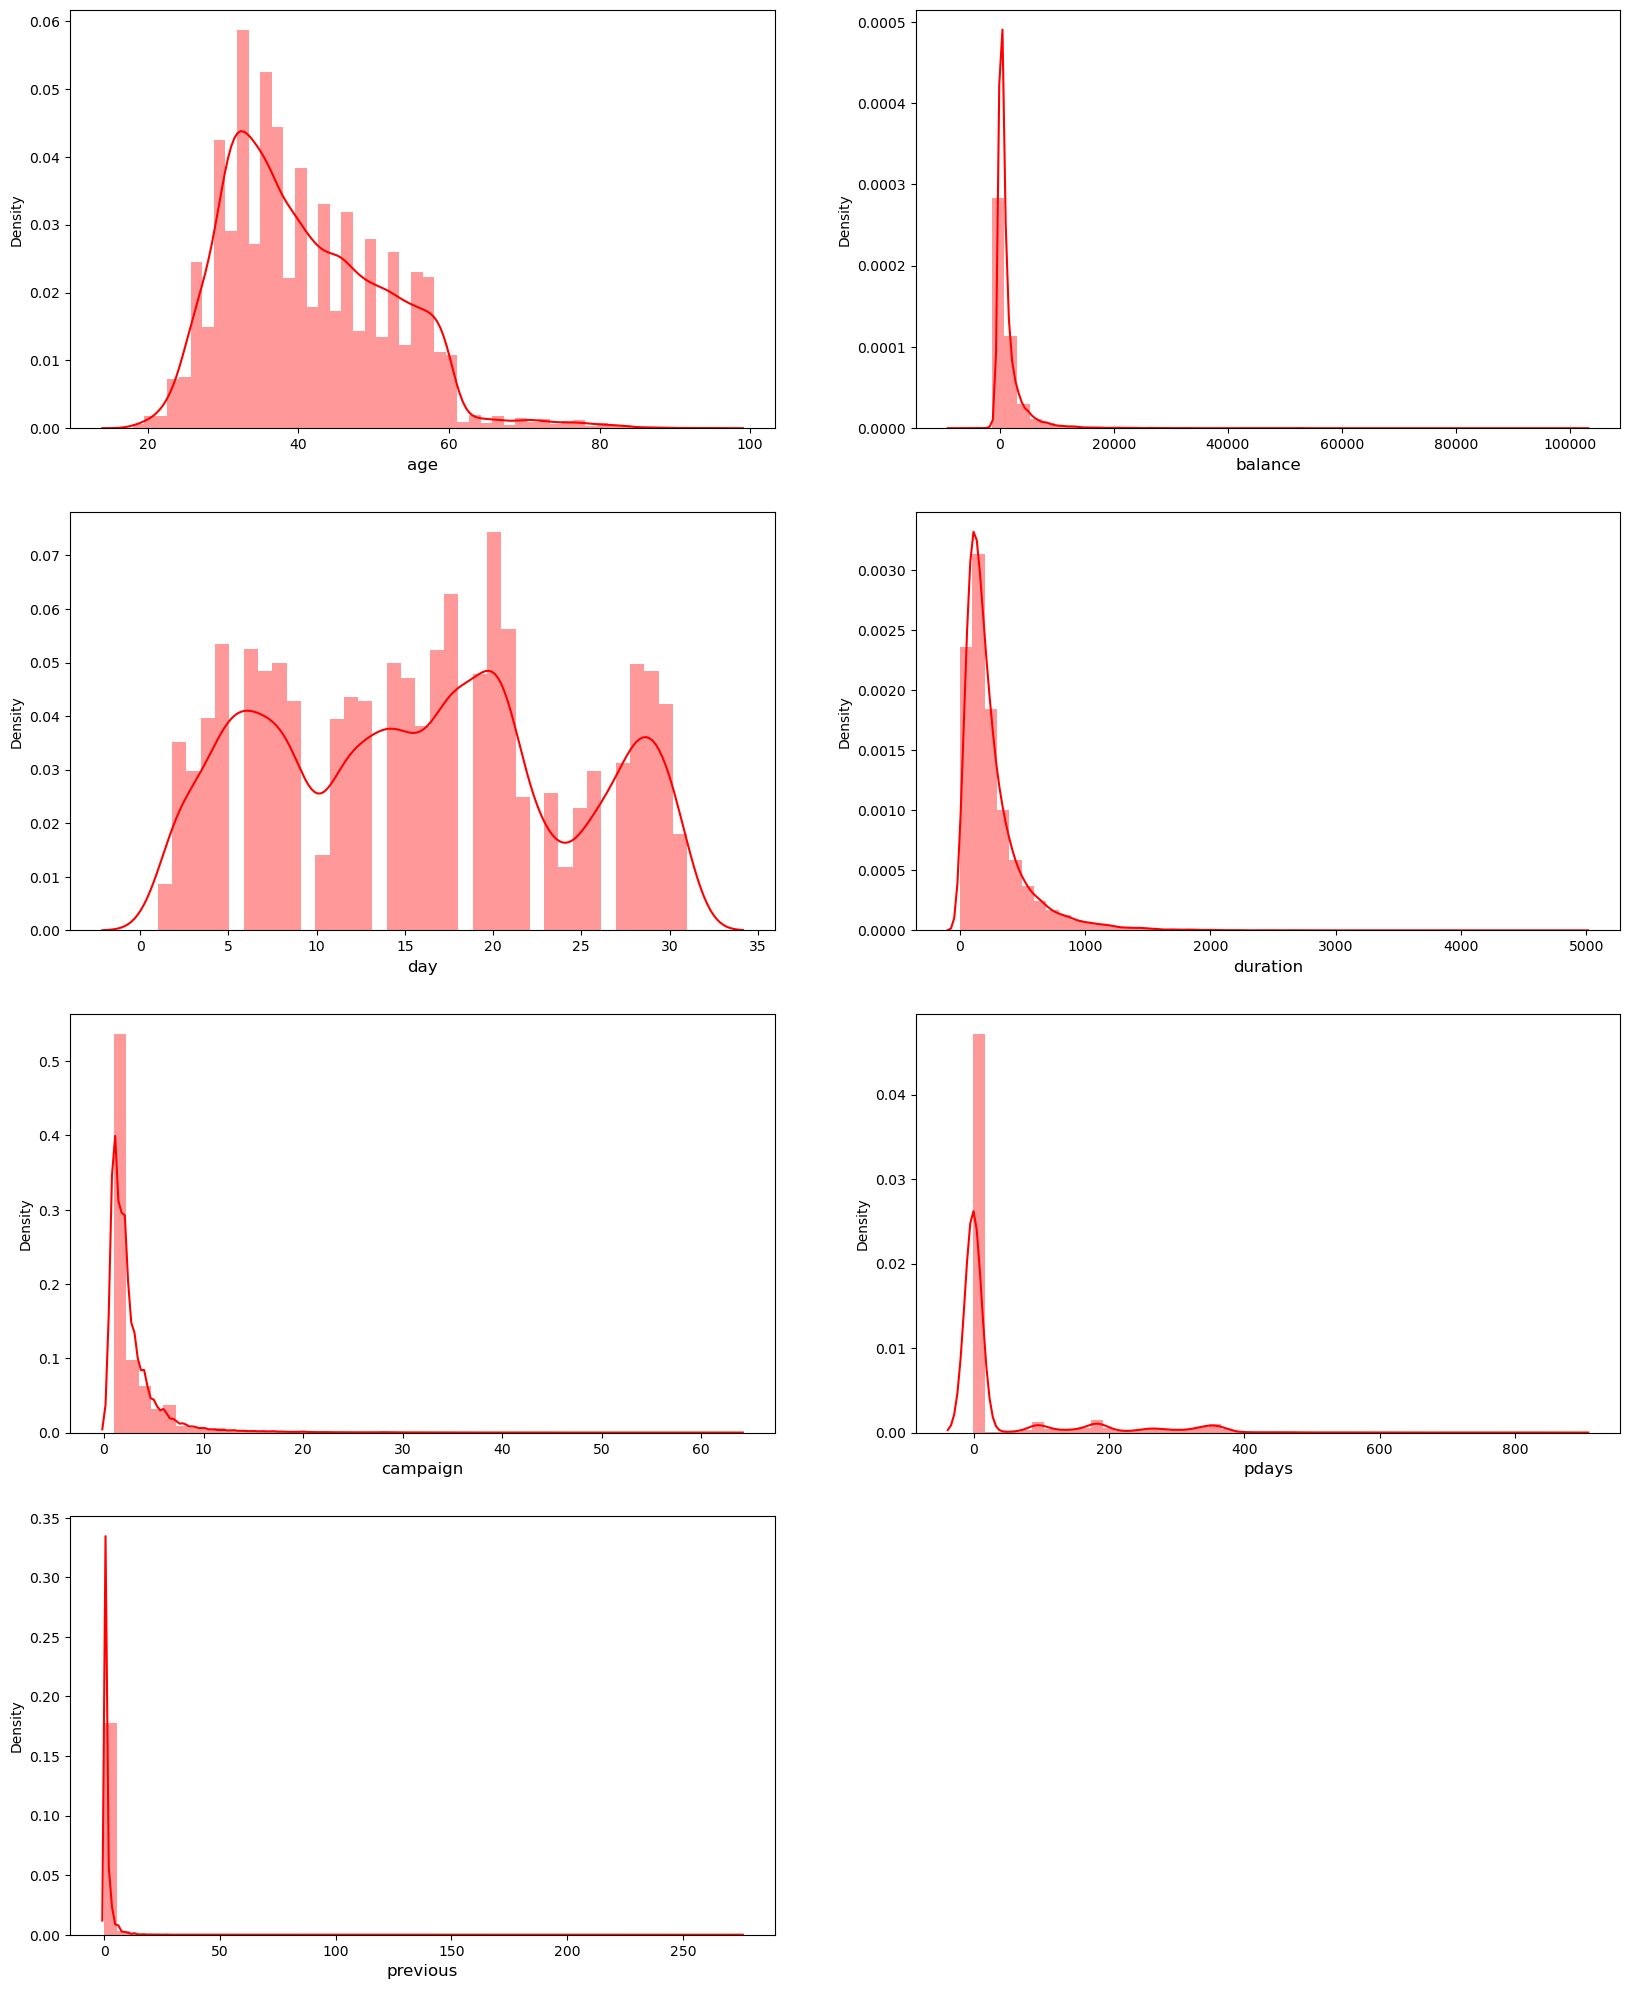

In [12]:
plt.figure (figsize=(20,25))
p=1
for i in num_col:
    if p<=7:
        plt.subplot(4,2,p)
        sns.distplot(df[i],color='red')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()

# Bi-Variate Analysis

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

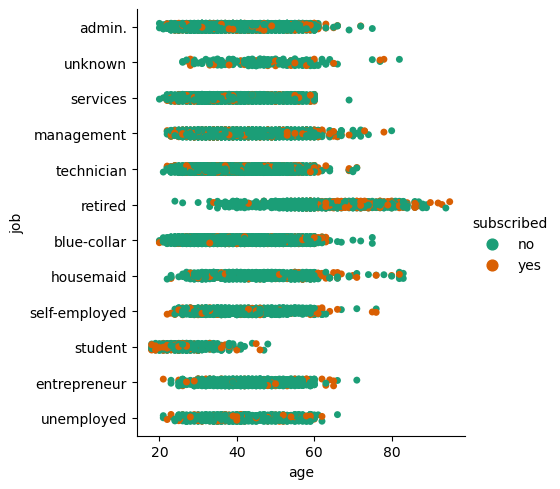

In [14]:
sns.catplot(data=df,x='age',y='job',hue='subscribed',palette='Dark2')

<AxesSubplot:xlabel='education', ylabel='job'>

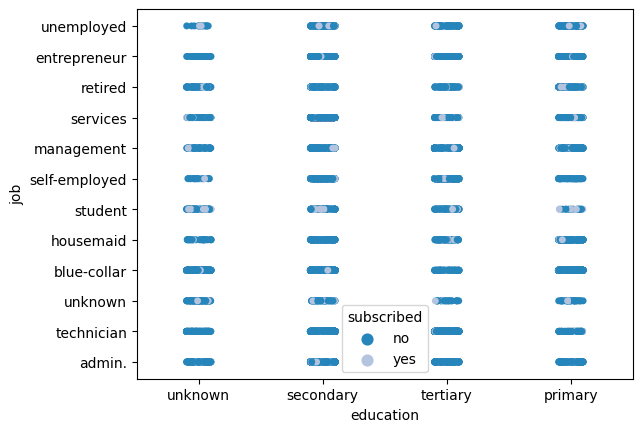

In [15]:
sns.stripplot(data=df,x='education',y='job',hue='subscribed',palette='PuBu_r')

<AxesSubplot:xlabel='balance', ylabel='loan'>

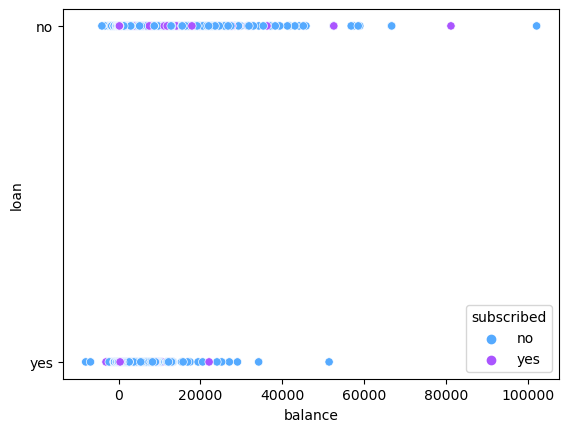

In [16]:
sns.scatterplot(data=df,x='balance',y='loan',hue='subscribed',palette='cool')

<AxesSubplot:xlabel='duration', ylabel='previous'>

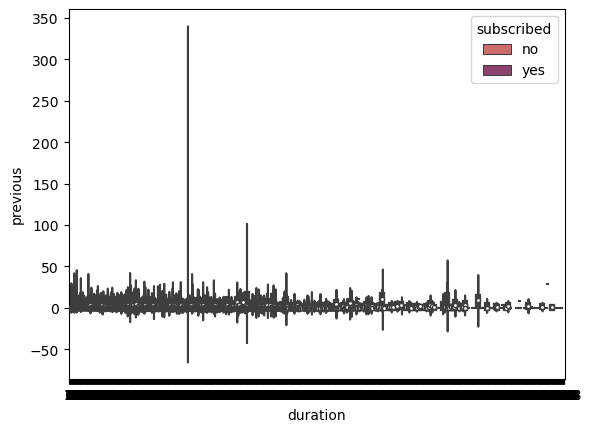

In [17]:
sns.violinplot(data=df,x='duration',y='previous',hue='subscribed',palette='flare')

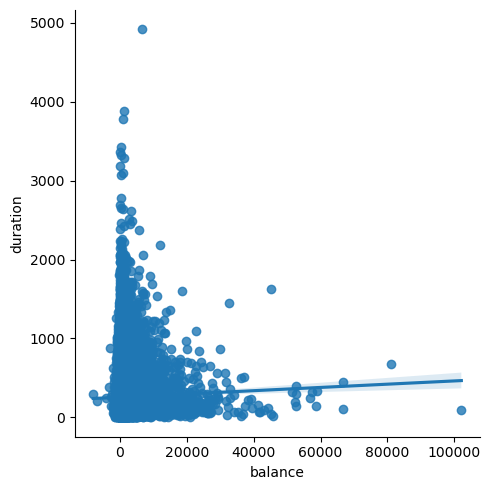

In [18]:
sns.lmplot(data=df,x='balance',y='duration',palette='cool_r')

# Multi-variate Analysis

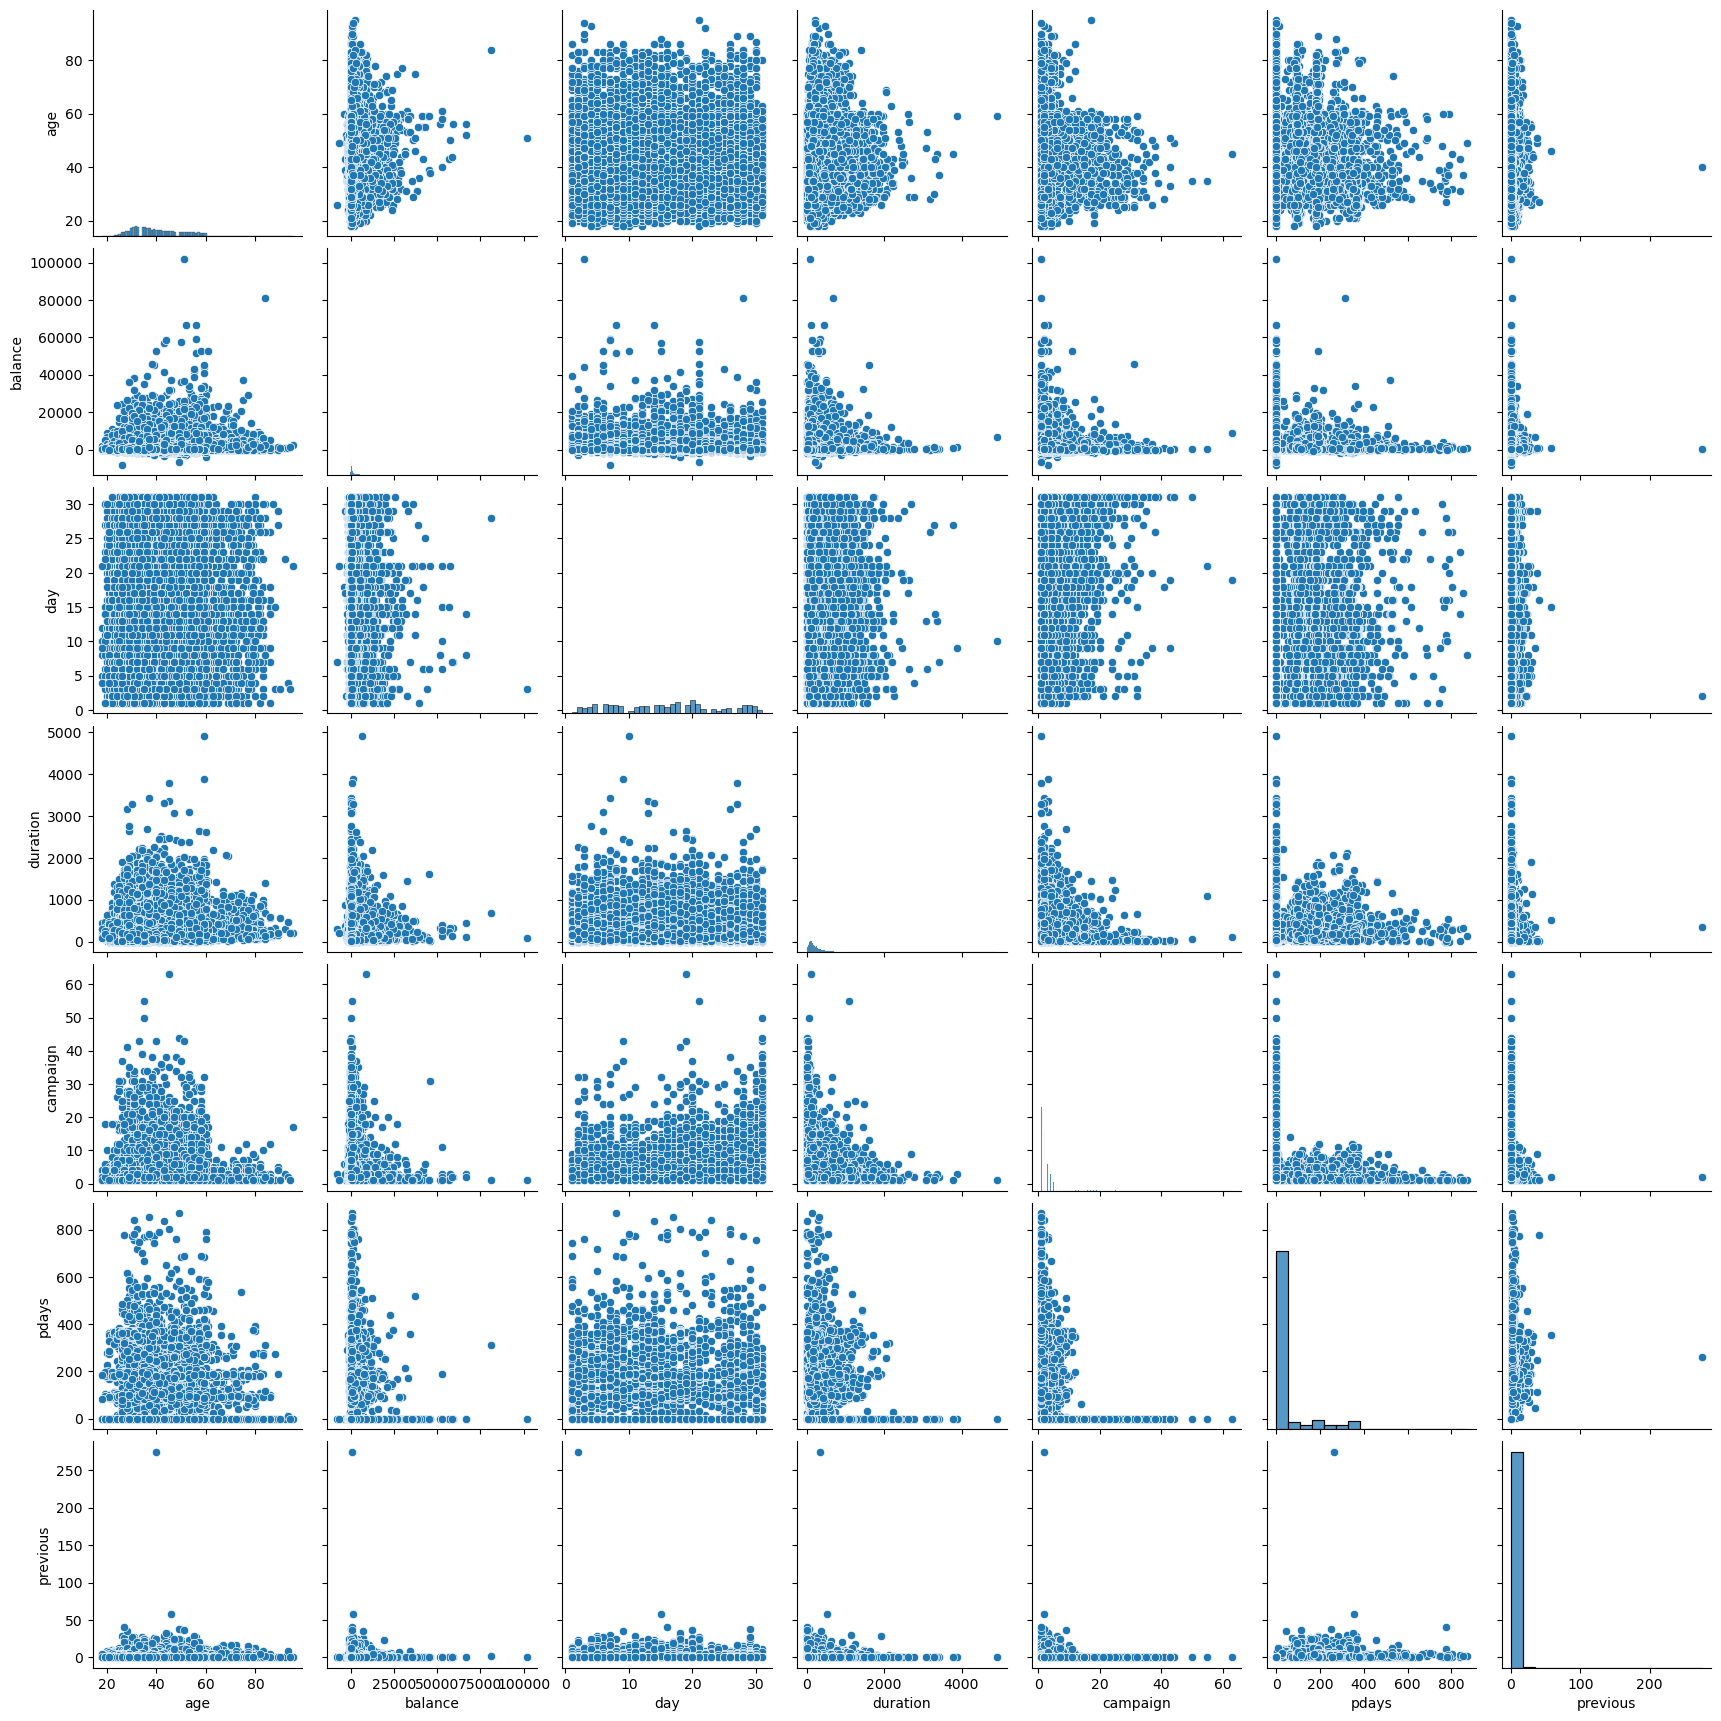

In [19]:
sns.pairplot(df,palette='Set2_r')

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0


In [22]:
#Printing unique values of each cat column
for i in cat_col:
    print(df[i].value_counts())
    print("\n")

1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


1    19095
2     8922
0     3630
Name: marital, dtype: int64


1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64


0    31062
1      585
Name: default, dtype: int64


1    17584
0    14063
Name: housing, dtype: int64


0    26516
1     5131
Name: loan, dtype: int64


0    20423
2     9177
1     2047
Name: contact, dtype: int64


8     9669
5     4844
1     4333
6     3738
9     2783
0     2055
3     1827
4      977
10     512
11     410
7      342
2      157
Name: month, dtype: int64


3    25929
0     3362
1     1288
2     1068
Name: poutcome, dtype: int64


0    27932
1     3715
Name: subscribed, dtype: int64




In [23]:
#Checking description after encoding
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


# Outliers Detection

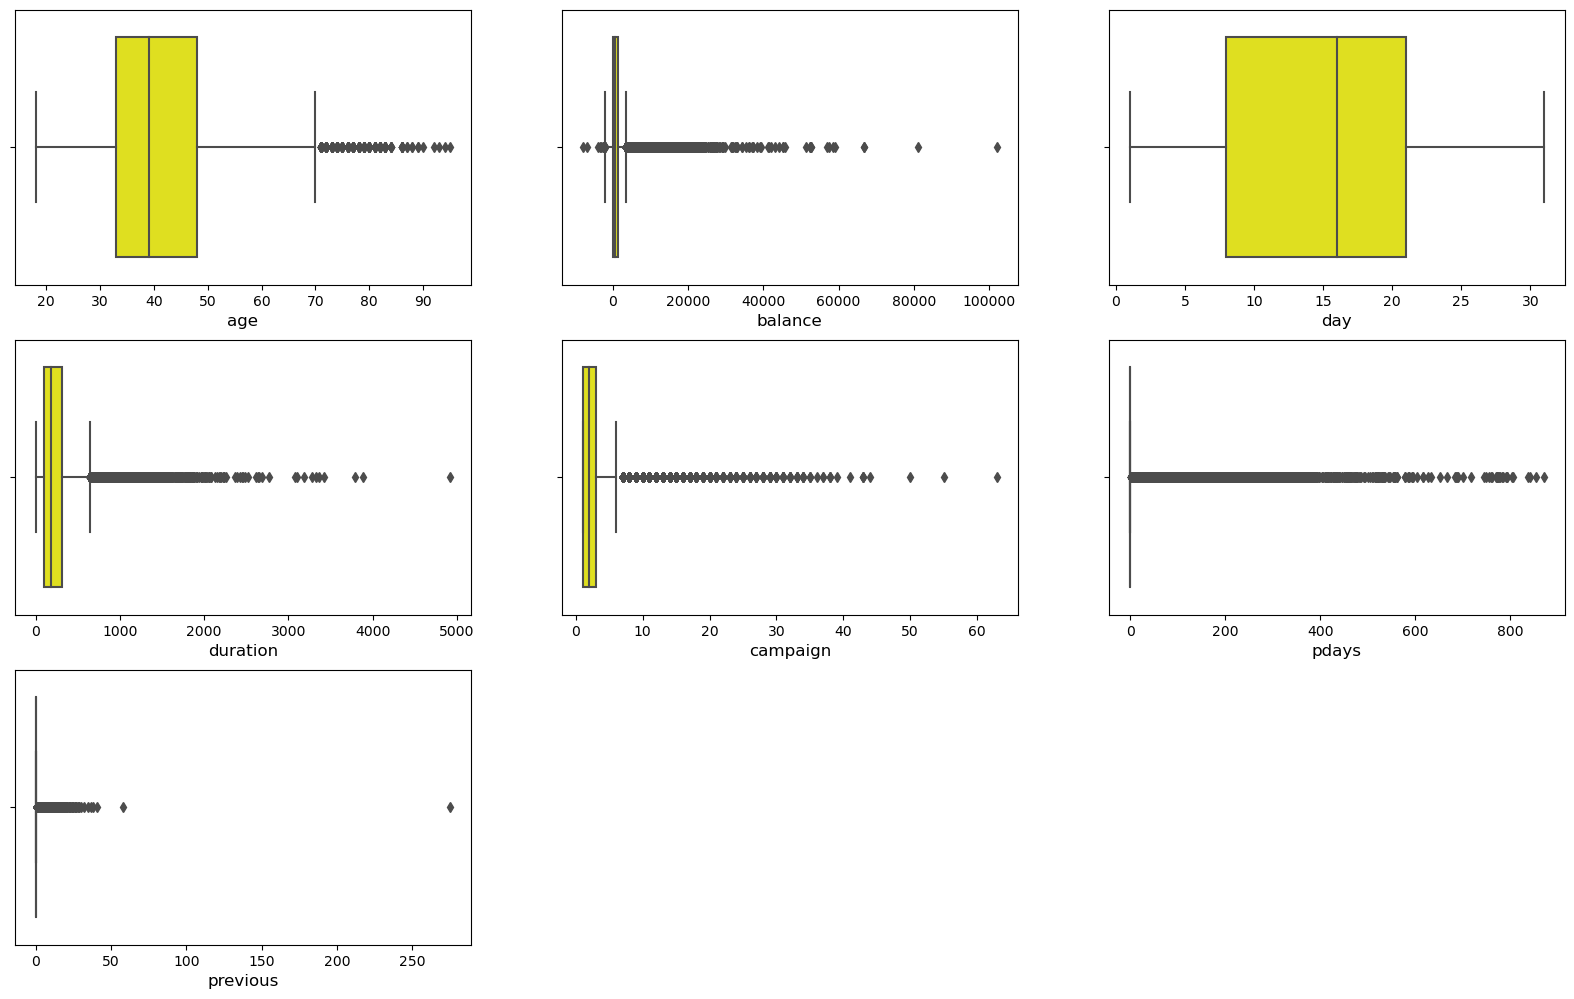

In [24]:
plt.figure (figsize=(20,25))
p=1
for i in num_col:
    if p<=7:
        plt.subplot(6,3,p)
        sns.boxplot(df[i],color='yellow')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()

We must remove outliers from the categorical columns thats why I have plotted only the numerical columns to detect outliers and as we can see there are outliers present in the dataset. Lets remove them to proceed further.

In [25]:
#Removing Outliers
outliers=df[['age','balance','duration','campaign','pdays','previous']]
outliers

,age,balance,duration,campaign,pdays,previous
ID,,,,,,
26110,56,1933,44,2,-1,0
40576,31,3,91,2,-1,0
15320,27,891,240,1,-1,0
43962,57,3287,867,1,84,3
29842,31,119,380,1,-1,0
...,...,...,...,...,...,...
36483,29,0,116,2,-1,0
40178,53,380,438,2,-1,0
19710,32,312,37,3,-1,0


In [26]:
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(outliers))
z

,age,balance,duration,campaign,pdays,previous
ID,,,,,,
26110,1.415793,0.187933,0.832754,0.245906,0.408555,0.237059
40576,0.937156,0.449397,0.649957,0.245906,0.408555,0.237059
15320,1.313627,0.156159,0.070449,0.567059,0.408555,0.237059
43962,1.509911,0.635055,2.368149,0.567059,0.447299,1.001336
29842,0.937156,0.411091,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...
36483,1.125392,0.450388,0.552724,0.245906,0.408555,0.237059
40178,1.133439,0.324903,0.699635,0.245906,0.408555,0.237059
19710,0.843038,0.347358,0.859979,0.075247,0.408555,0.237059


In [28]:
threshold=3
print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([3, 1, 4, ..., 4, 5, 2], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0


In [30]:
#Computing data loss after removing outliers
print("Data Loss Percentage from zscore =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Data Loss Percentage from zscore = 11.132176825607482


Here we can see dataloss is high so we can continue with this dataset. Lets check IQR method for removing outliers

In [31]:
#Removing outliers using IQR
Q1=outliers.quantile(0.25)
Q3=outliers.quantile(0.75)
IQR=Q3-Q1

In [32]:
df_iqr=df[~((df<(Q1-1.5*IQR))|(df >(Q3+1.5*IQR))).any(axis=1)]

In [33]:
print("Data Loss Percentage in IQR =",(df.shape[0]-df_iqr.shape[0])/df.shape[0]*100)

Data Loss Percentage in IQR = 37.437987802951305


Here also we can see data loss percentage is too high.

Lets proceed and see model building with dataset after removing outliers (zscore)

# Skewness

In [34]:
df_new.skew()

age           0.438496
job           0.260890
marital      -0.097176
education     0.199721
default       7.007588
balance       2.437605
housing      -0.203589
loan          1.787691
contact       0.694487
day           0.073752
month        -0.471673
duration      1.596552
campaign      2.059359
pdays         2.824483
previous      3.691573
poutcome     -2.473077
subscribed    2.635813
dtype: float64

We can see the 'default', 'balance', 'loan','duration','campaign','pdays','previous','poutcome' columns are having skewness, lets visualize it.

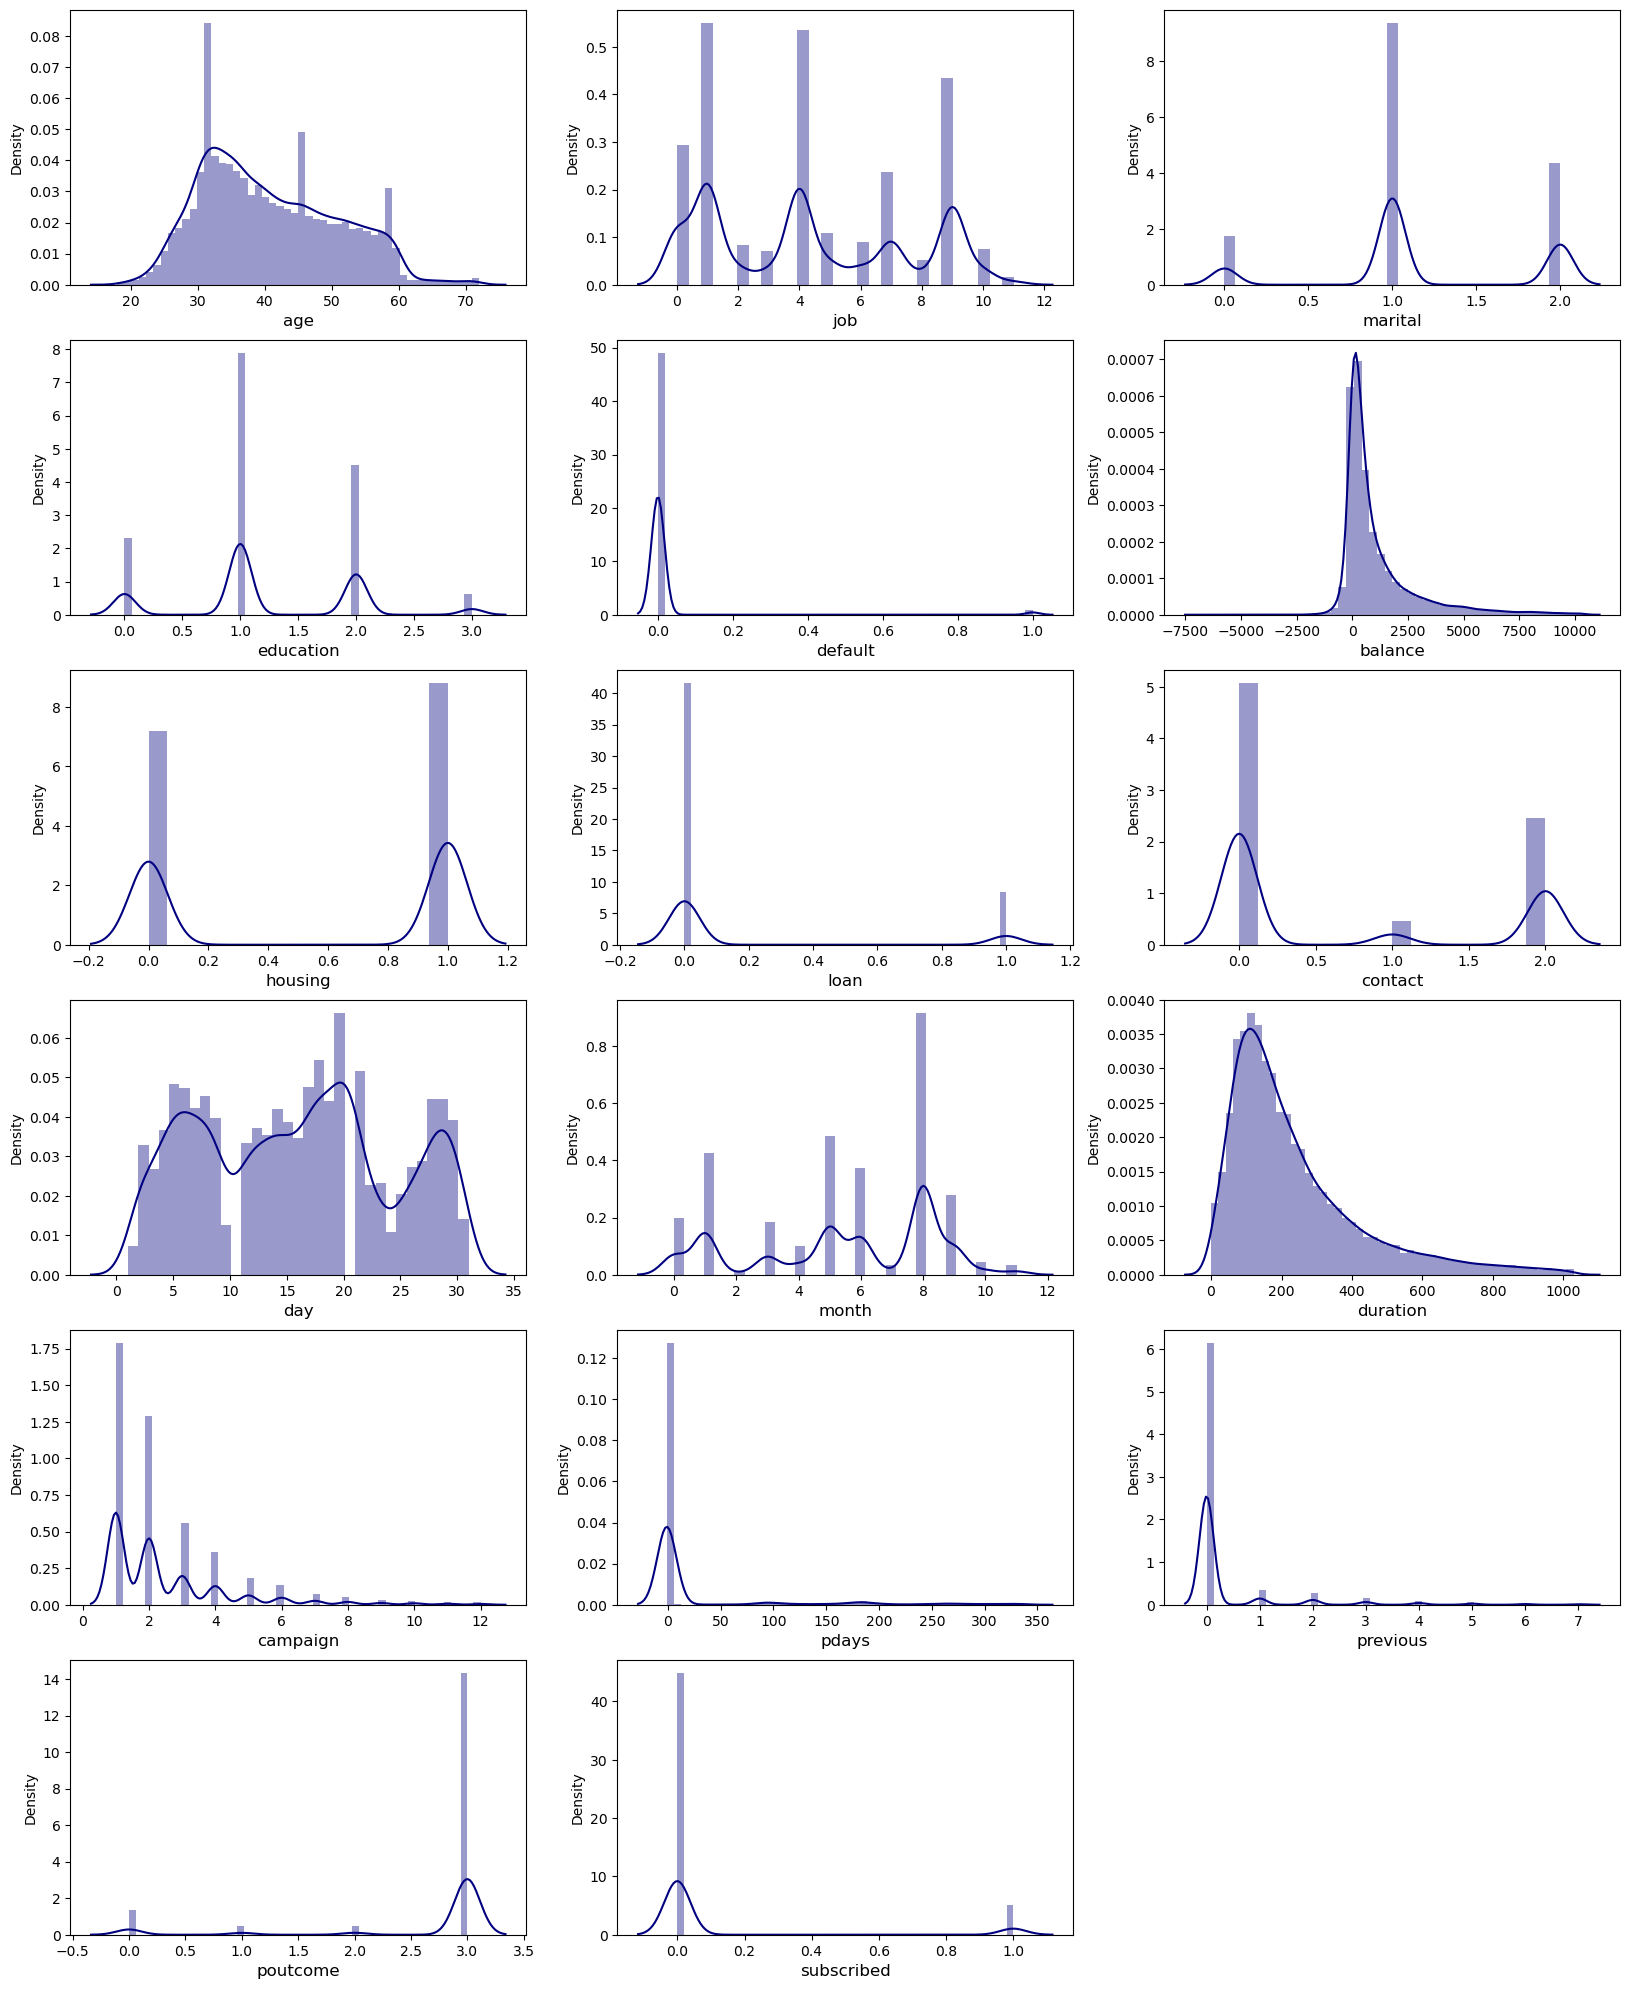

In [35]:
#visulaizing the skewness
plt.figure (figsize=(20,25))
p=1
for i in df_new:
    if p<=17:
        plt.subplot(6,3,p)
        sns.distplot(df_new[i],color='navy')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()

In [36]:
df_new['balance']=np.cbrt(df_new['balance'])
df_new['loan']=np.cbrt(df_new['loan'])
df_new['duration']=np.cbrt(df_new['duration'])
df_new['campaign']=np.cbrt(df_new['campaign'])
df_new['pdays']=np.cbrt(df_new['pdays'])
df_new['previous']=np.cbrt(df_new['previous'])
df_new['poutcome']=np.cbrt(df_new['poutcome'])

# Correlation

<AxesSubplot:>

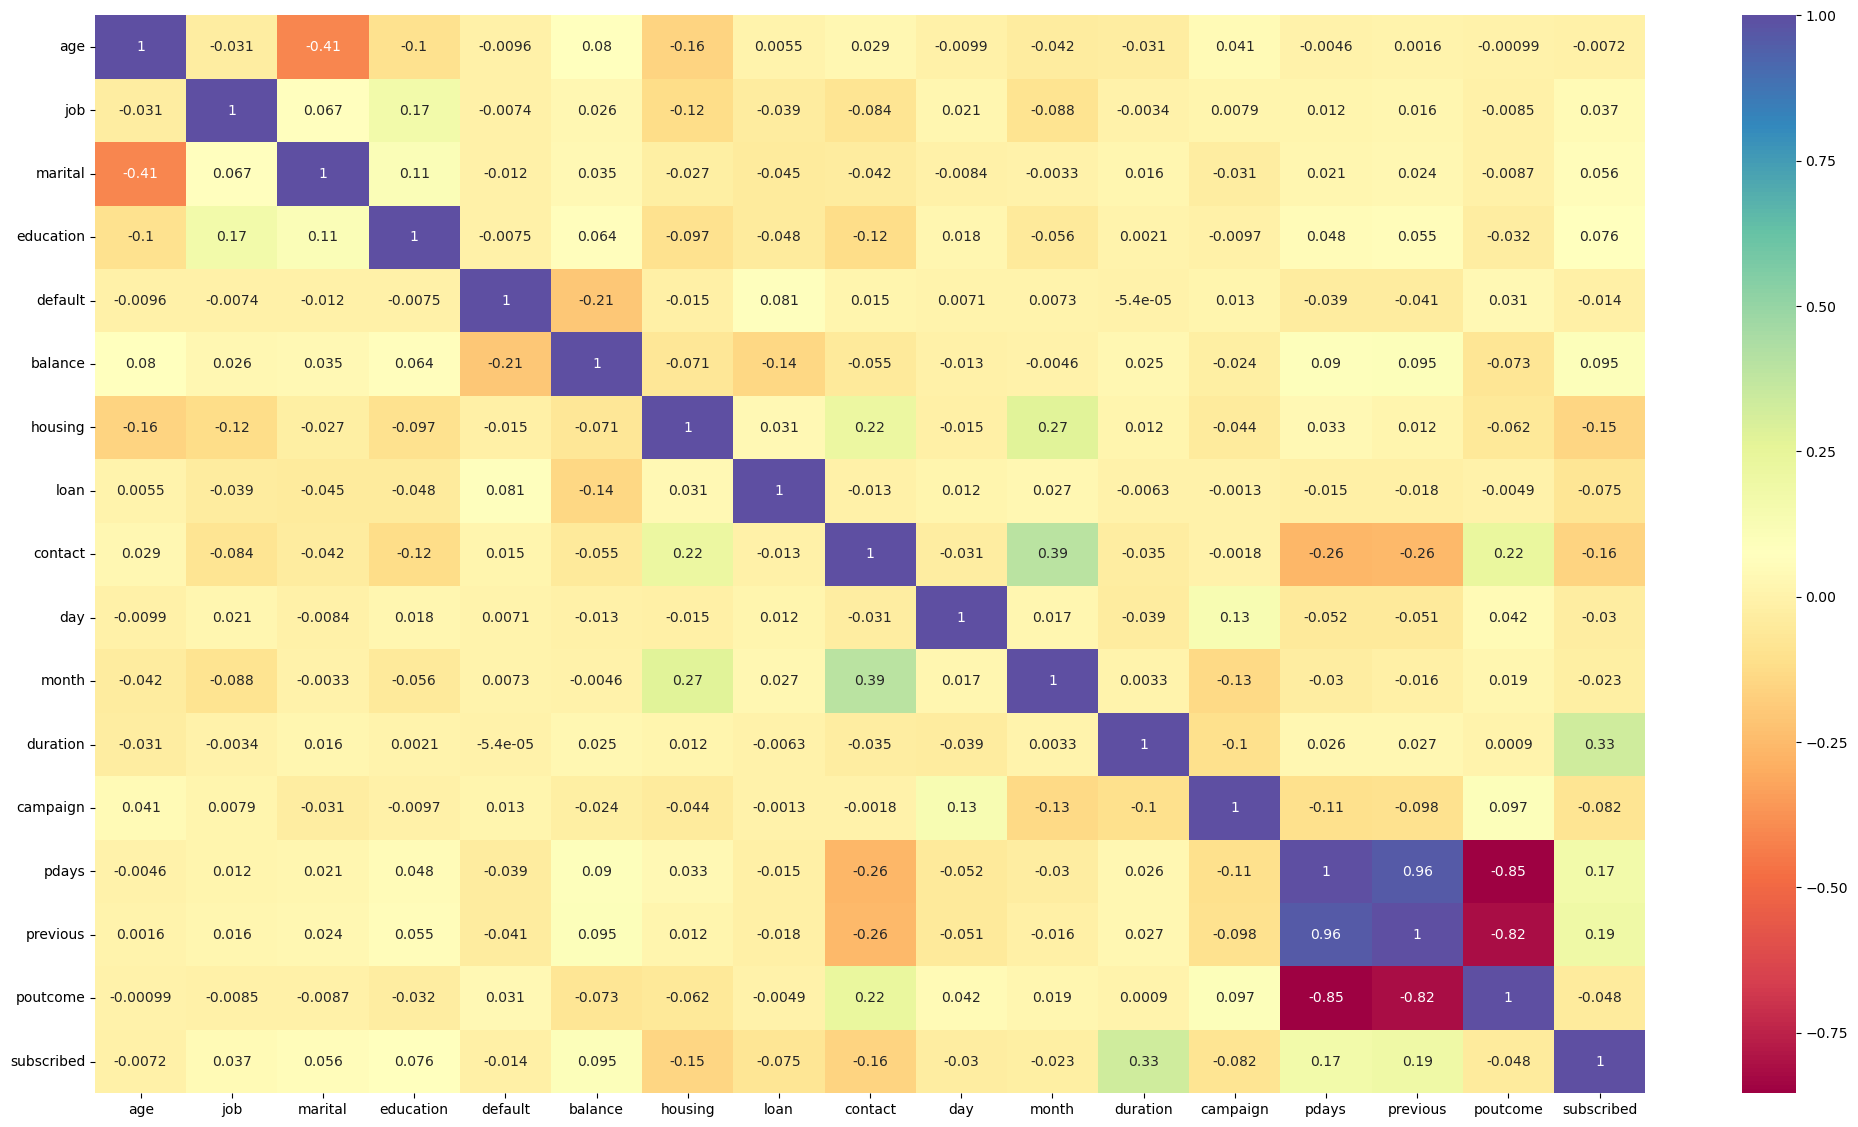

In [37]:
plt.figure (figsize=(25,14))
sns.heatmap(df_new.corr(),annot=True,cmap='Spectral')

In [38]:
df_new.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030552,-0.411087,-0.100363,-0.009616,0.079543,-0.155557,0.005488,0.029036,-0.009937,-0.042070,-0.031297,0.040856,-0.004609,0.001564,-0.000994,-0.007172
job,-0.030552,1.000000,0.067076,0.169526,-0.007400,0.026094,-0.122764,-0.038629,-0.084375,0.020514,-0.088359,-0.003418,0.007853,0.012431,0.016147,-0.008533,0.036743
marital,-0.411087,0.067076,1.000000,0.109940,-0.012221,0.034716,-0.026593,-0.045159,-0.042070,-0.008386,-0.003321,0.016357,-0.030809,0.021377,0.023993,-0.008662,0.056387
education,-0.100363,0.169526,0.109940,1.000000,-0.007467,0.064140,-0.096581,-0.047982,-0.121975,0.017677,-0.056416,0.002066,-0.009684,0.048220,0.054828,-0.031622,0.075838
default,-0.009616,-0.007400,-0.012221,-0.007467,1.000000,-0.209161,-0.014763,0.081270,0.014592,0.007138,0.007290,-0.000054,0.012757,-0.038843,-0.040773,0.031290,-0.014500
balance,0.079543,0.026094,0.034716,0.064140,-0.209161,1.000000,-0.070652,-0.140556,-0.055374,-0.013262,-0.004558,0.024577,-0.023629,0.090450,0.094890,-0.072692,0.094746
housing,-0.155557,-0.122764,-0.026593,-0.096581,-0.014763,-0.070652,1.000000,0.031251,0.215776,-0.015138,0.274293,0.011891,-0.043774,0.033460,0.011504,-0.062177,-0.145640
loan,0.005488,-0.038629,-0.045159,-0.047982,0.081270,-0.140556,0.031251,1.000000,-0.012620,0.011949,0.026898,-0.006263,-0.001319,-0.014711,-0.018351,-0.004912,-0.074803
contact,0.029036,-0.084375,-0.042070,-0.121975,0.014592,-0.055374,0.215776,-0.012620,1.000000,-0.030543,0.392662,-0.034850,-0.001789,-0.261336,-0.257049,0.224936,-0.158031
day,-0.009937,0.020514,-0.008386,0.017677,0.007138,-0.013262,-0.015138,0.011949,-0.030543,1.000000,0.017204,-0.039272,0.132730,-0.051627,-0.050992,0.041980,-0.030122


In [39]:
df_new.corr()['subscribed'].sort_values()

contact      -0.158031
housing      -0.145640
campaign     -0.081699
loan         -0.074803
poutcome     -0.048104
day          -0.030122
month        -0.022564
default      -0.014500
age          -0.007172
job           0.036743
marital       0.056387
education     0.075838
balance       0.094746
pdays         0.167936
previous      0.189480
duration      0.328075
subscribed    1.000000
Name: subscribed, dtype: float64

In [40]:
#Separating target and feature columns
x=df_new.iloc[:,0:-1]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
26110,56,0,1,3,0,12.456918,0,0.0,1,19,9,3.530348,1.259921,-1.000000,0.00000,1.442250
40576,31,11,1,1,0,1.442250,0,0.0,0,20,5,4.497941,1.259921,-1.000000,0.00000,1.442250
15320,27,7,1,1,0,9.622603,1,0.0,0,18,5,6.214465,1.000000,-1.000000,0.00000,1.442250
43962,57,4,0,2,0,14.868480,0,0.0,0,22,6,9.535417,1.000000,4.379519,1.44225,1.259921
29842,31,9,1,1,0,4.918685,1,0.0,0,4,3,7.243156,1.000000,-1.000000,0.00000,1.442250


In [41]:
y=df_new.iloc[:,-1]
y.head()

ID
26110    0
40576    0
15320    0
43962    1
29842    0
Name: subscribed, dtype: int32

In [42]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

We can see this dataset is not balanced, lets balance it.

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [45]:
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

Now we have a balanced dataset.

# Modelling

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [47]:
#Finding the best random state
max_acc=0
max_RS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_acc:
        max_acc=score
        max_RS=i
print("Best Accuracy Score at random state",max_RS,"is",max_acc,".")

Best Accuracy Score at random state 51 is 0.9154297776898213 .


In [48]:
#creating train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_RS)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35369, 16)
(35369,)
(15159, 16)
(15159,)


In [49]:
#importing necessary algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rf_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rf_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,rf_pred))
print("Classification Report\n",classification_report(y_test,rf_pred))

Accuracy Score = 0.9439276997163402
Confusion Matrix
 [[7035  528]
 [ 322 7274]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      7563
           1       0.93      0.96      0.94      7596

    accuracy                           0.94     15159
   macro avg       0.94      0.94      0.94     15159
weighted avg       0.94      0.94      0.94     15159



In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,dtc_pred))
print("Classification Report\n",classification_report(y_test,dtc_pred))

Accuracy Score = 0.9149680058051323
Confusion Matrix
 [[6855  708]
 [ 581 7015]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7563
           1       0.91      0.92      0.92      7596

    accuracy                           0.91     15159
   macro avg       0.92      0.91      0.91     15159
weighted avg       0.92      0.91      0.91     15159



In [52]:
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,sv_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,sv_pred))
print("Classification Report\n",classification_report(y_test,sv_pred))

Accuracy Score = 0.8506497790091695
Confusion Matrix
 [[6159 1404]
 [ 860 6736]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7563
           1       0.83      0.89      0.86      7596

    accuracy                           0.85     15159
   macro avg       0.85      0.85      0.85     15159
weighted avg       0.85      0.85      0.85     15159



In [53]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,knn_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,knn_pred))
print("Classification Report\n",classification_report(y_test,knn_pred))

Accuracy Score = 0.900587109967676
Confusion Matrix
 [[6124 1439]
 [  68 7528]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      7563
           1       0.84      0.99      0.91      7596

    accuracy                           0.90     15159
   macro avg       0.91      0.90      0.90     15159
weighted avg       0.91      0.90      0.90     15159



# Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
sv_score=cross_val_score(sv,x,y)
print(sv_score)
print(sv_score.mean())
print("The difference between accuracy and CV score is",(accuracy_score(y_test,sv_pred)-sv_score.mean()))

[0.82594498 0.85572927 0.85315654 0.86016823 0.86145473]
0.851290750503838
The difference between accuracy and CV score is -0.000640971494668463


In [56]:
knn_score=cross_val_score(knn,x,y)
print(knn_score)
print(knn_score.mean())
print("The difference between accuracy and CV score is",(accuracy_score(y_test,knn_pred)-knn_score.mean()))

[0.90609539 0.9022363  0.90965763 0.91044038 0.90697674]
0.9070812867033492
The difference between accuracy and CV score is -0.006494176735673207


In [57]:
rfc_score=cross_val_score(rfc,x,y)
print(rfc_score)
print(rfc_score.mean())
print("The difference between accuracy and CV score is",(accuracy_score(y_test,rf_pred)-rfc_score.mean()))

[0.86433802 0.96140906 0.9599248  0.96229589 0.96199901]
0.941993356321067
The difference between accuracy and CV score is 0.001934343395273208


Here we can see the value of Random Forest Classifier is the best to continue with.

In [61]:
final_model=rfc
final_model

RandomForestClassifier()

# ROC AUC

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [68]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr, tpr)

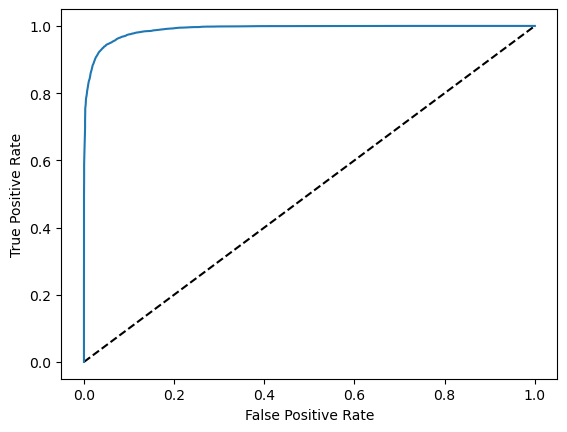

In [69]:
#plotting the curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [71]:
auc_score=roc_auc_score(y_test,y_pred_prob)
print("AUC Score =",auc_score)

AUC Score = 0.9897206018157325


# Saving the model

In [73]:
import joblib
joblib.dump(final_model,"Term Deposit Prediction.pkl")

['Term Deposit Prediction.pkl']

# Predicting the saved model

In [74]:
model=joblib.load("Term Deposit Prediction.pkl")
model.fit(x,y)
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
#creating a dataset for the actual and predicted value from the model
actual=np.array(y_test)
ds=pd.DataFrame({"Actual Value":actual,"Predicted Value":prediction})
ds

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
15154,0,0
15155,1,1
15156,0,0
15157,0,0
